In [1]:
import pandas as pd

In [2]:
wine_data = pd.read_csv('../data/California_Wines.csv')

wine_fire_data = pd.read_csv('../data/final_wine_and_fire_data.csv')

In [3]:
central_coast_data = pd.read_csv('../data/temperature_data/CentralCoast_temp.csv', skiprows=1)
central_valley_data = pd.read_csv('../data/temperature_data/NorthCentral_temp.csv', skiprows=1)
north_coast_data = pd.read_csv('../data/temperature_data/NorthCoast_temp.csv', skiprows=1)
sac_delta_data = pd.read_csv('../data/temperature_data/SacDelta_temp.csv', skiprows=1)
sierra_data = pd.read_csv('../data/temperature_data/Sierra_temp.csv', skiprows=1)


In [4]:
def region_mapper(region):
    switch = {
        'Napa': sac_delta_data,
        'Sonoma' : sac_delta_data,
        'Napa-Sonoma' : sac_delta_data,
        'Central Coast' : central_coast_data,
        'Sierra Foothills' : sierra_data,
        'North Coast' : north_coast_data,
        'Central Valley' : central_valley_data,
        
        'California Other': pd.DataFrame()
    }
    return switch.get(region, pd.DataFrame())
    

In [5]:
wine_fire_data['mean_temp'] = 0
for index, row in wine_fire_data.iterrows():
    temp_data = region_mapper(row['region_2'])
    try:
        wine_fire_data.loc[index, 'mean_temp'] = float(temp_data.loc[temp_data.loc[:,'Year'] == row['vintage'],'Mean_Temperature_deg_F'])
    except:
        wine_fire_data.loc[index, 'mean_temp'] = float('NaN')
wine_fire_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,sum_fire_size_current,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,norm_total_fires_current,norm_sum_fire_size_current,mean_temp
0,0,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,...,1756.38,0.009921,0.113960,0.006955,0.070707,0.000000,0.000000,0.450893,0.006877,59.757174
1,1,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,...,639.14,0.009921,0.464387,0.008445,0.070707,0.008929,0.000310,0.428571,0.002502,57.042925
2,2,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,...,1756.38,0.009921,0.626781,0.031793,0.070707,0.000000,0.000000,0.450893,0.006877,59.757174
3,3,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,...,1453.08,0.010913,0.113960,0.047193,0.060606,0.272321,0.005246,0.551339,0.005689,61.338887
4,4,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,...,2711.55,0.011905,0.732194,0.010432,0.060606,0.183036,0.002815,0.243304,0.010616,60.220294


In [6]:
central_coast_data = pd.read_csv('../data/rain_data/CentralCoast_rain.csv', skiprows=1)
central_valley_data = pd.read_csv('../data/rain_data/NorthCentral_rain.csv', skiprows=1)
north_coast_data = pd.read_csv('../data/rain_data/NorthCoast_rain.csv', skiprows=1)
sac_delta_data = pd.read_csv('../data/rain_data/SacDelta_rain.csv', skiprows=1)
sierra_data = pd.read_csv('../data/rain_data/Sierra_rain.csv', skiprows=1)


In [7]:
wine_fire_data['mean_rain'] = 0
for index, row in wine_fire_data.iterrows():
    temp_data = region_mapper(row['region_2'])
    try:
        wine_fire_data.loc[index, 'mean_rain'] = float(temp_data.loc[temp_data.loc[:,'Year'] == row['vintage'],'Precipitation_in'])
    except:
        wine_fire_data.loc[index, 'mean_rain'] = float('NaN')
wine_fire_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,norm_total_fires_current,norm_sum_fire_size_current,mean_temp,mean_rain
0,0,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,...,0.009921,0.113960,0.006955,0.070707,0.000000,0.000000,0.450893,0.006877,59.757174,18.040338
1,1,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,...,0.009921,0.464387,0.008445,0.070707,0.008929,0.000310,0.428571,0.002502,57.042925,23.084964
2,2,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,...,0.009921,0.626781,0.031793,0.070707,0.000000,0.000000,0.450893,0.006877,59.757174,18.040338
3,3,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,...,0.010913,0.113960,0.047193,0.060606,0.272321,0.005246,0.551339,0.005689,61.338887,5.535779
4,4,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,...,0.011905,0.732194,0.010432,0.060606,0.183036,0.002815,0.243304,0.010616,60.220294,12.206211


In [10]:
wine_fire_data['norm_temp'] = abs((wine_fire_data.mean_temp - wine_fire_data.mean_temp.min()) / (wine_fire_data.mean_temp.max()))

wine_fire_data['norm_rain'] = abs((wine_fire_data.mean_rain - wine_fire_data.mean_rain.min()) / (wine_fire_data.mean_rain.max()))

In [11]:
wine_fire_data.drop(columns=['Unnamed: 0'], inplace = True)
wine_fire_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,norm_total_fires_current,norm_sum_fire_size_current,mean_temp,mean_rain,norm_temp,norm_rain
0,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,...,0.006955,0.070707,0.000000,0.000000,0.450893,0.006877,59.757174,18.040338,0.219366,0.137560
1,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,...,0.008445,0.070707,0.008929,0.000310,0.428571,0.002502,57.042925,23.084964,0.176770,0.192200
2,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,...,0.031793,0.070707,0.000000,0.000000,0.450893,0.006877,59.757174,18.040338,0.219366,0.137560
3,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,...,0.047193,0.060606,0.272321,0.005246,0.551339,0.005689,61.338887,5.535779,0.244188,0.002119
4,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,...,0.010432,0.060606,0.183036,0.002815,0.243304,0.010616,60.220294,12.206211,0.226633,0.074369


In [12]:
#wine_fire_data.to_csv('../data/wine_fire_weather_data.csv')

In [13]:
wine_fire_data.dropna(inplace = True)
wine_fire_data.shape

(9268, 34)

In [14]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

0.08167672493930123


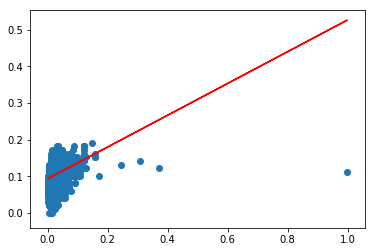

In [21]:
data = wine_fire_data
x = data.loc[:, ['norm_price']]
y = data.loc[:, ['norm_points']]

reg = LinearRegression().fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)
plt.plot(x,predict,color = 'red')
plt.show()